In [1]:
# Programming
import pandas as pd
import numpy as np

# Machine Learning | sklearn
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Other
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('nasa.csv')

In [3]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
# Fixing seed for reproducibility
seed = 1234

INTRODUCTION

Data


The data is about Asteroids - NeoWs. NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.Inspiration is to find potential hazardous, non-hazardous asteroids and features responsible for claiming an asteroid to be hazardous.

Task

In this notebook, the use of the 'xgboost' algorithm for classification is demonstrated. The scope of this case study is to predict whether an asteroid can be hazardous or not based on its characteristics/properties using XGBClassifier, BayesianOptimization and RandomizedSearchCV function.

In [5]:
#Lets see the shapes of the data so we know what we are dealing with
df.shape

(4687, 40)

In [6]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [8]:
df.describe()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [9]:
#let's look the columns
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [10]:
#let's drop unnecessary columns
df = df.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date',
                        'Epoch Date Close Approach', 'Orbit Determination Date'] , axis = 1)

# EDA

Lets create a heatmap graphic here. With this graphics we can see the correlation between different features

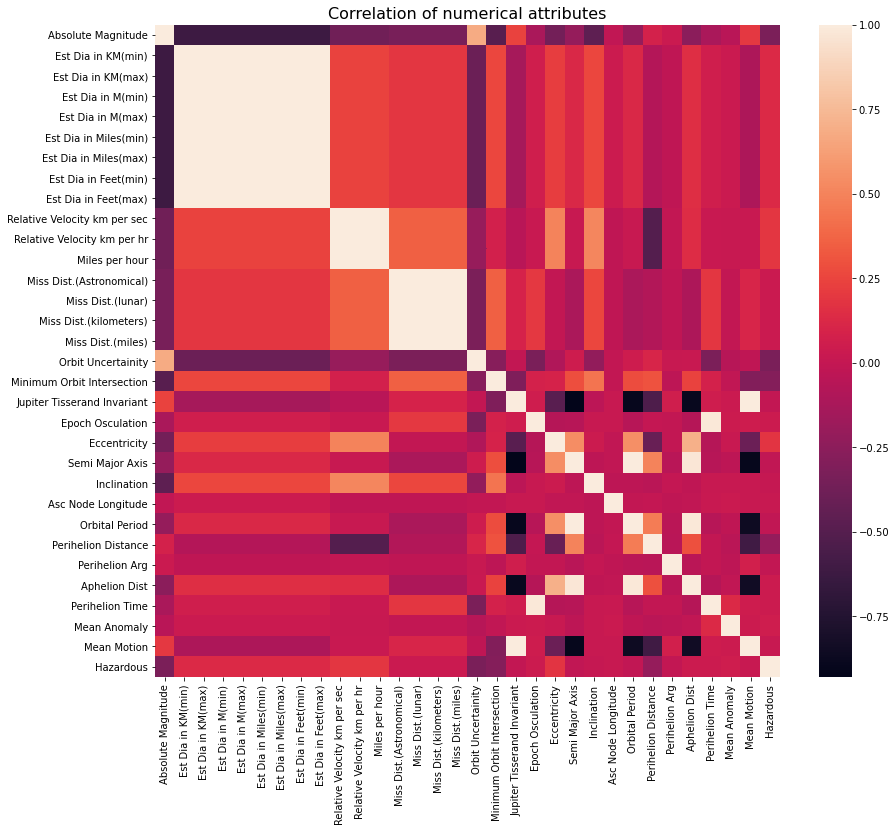

In [11]:
correlation = df.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

# Categorical Feature Encoding

In [12]:
# Encoding the target variable
l_enc = LabelEncoder()
df['hazardous'] = l_enc.fit_transform(df.Hazardous) 
print('Hazardous == True -> 1')
print('Hazardous == False -> 0\n')

# Checking the other categorical features 
print(df['Orbiting Body'].unique())
print(df['Equinox'].unique())
print('\n')
# Removing them since there is only a single value that is identical across all observations
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis=1)

# Check after all the changes
print(df.info())

Hazardous == True -> 1
Hazardous == False -> 0

['Earth']
['J2000']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float

# Train/Test Split

In [13]:
# Creating the Features/Label split 
X = df.drop('hazardous', axis=1).values
y = df.hazardous.values

# Creating the test/train split
X_train, X_test, y_train, y_test  = train_test_split(X, y,     test_size=0.4, stratify=y, random_state=seed)
# Getting feature labels for future plotting
df_graph = df.copy()
feature_names = df_graph.drop('hazardous', axis=1).columns.tolist()
del df_graph

# XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) ... A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems. The XGBoost library provides a built-in function to plot features ordered by their importance.

In [14]:
#Creating hyperparameter options
xgb_params = {'max_depth': np.arange(0, 5, 1),
              'objective': ['binary:logistic'],
              'random_state': [seed],
              'alpha': [0, 0.01, 0.1, 1],
              'lambda': [0, 0.01, 0.1, 1],
              'subsample': [0.25, 0.5, 0.75],
              'colsample_bytree': [0.25, 0.5, 0.75],
              'eval_metric': ['logloss']}

# GrideSearcCV
xgb_grid = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_params,
                            scoring='accuracy', cv=5)
xgb_grid.fit(X_train, y_train)
xgb_opt_param = xgb_grid.best_params_
xgb_best_score = (xgb_grid.best_score_*100).round(2)
xgb_best_est = xgb_grid.best_estimator_
xgb_feat_imp = xgb_best_est.feature_importances_

# Score on holdout data
xgb_holdout_score = (xgb_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(xgb_opt_param)
print('Optimal Estimator:')
print(xgb_best_est)
print('\n')
print('Training Accuracy {}'.format(xgb_best_score))
print('Testing Accuracy {}'.format(xgb_holdout_score))

Optimal Hyperparameters:
{'alpha': 0, 'colsample_bytree': 0.5, 'eval_metric': 'logloss', 'lambda': 0, 'max_depth': 2, 'objective': 'binary:logistic', 'random_state': 1234, 'subsample': 0.75}
Optimal Estimator:
XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=0, learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1234, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None)


Training Accuracy 99.75
Testing Accuracy 99.47


In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
#predictions
xgb_grid_preds = xgb_grid.predict(X_test)
print(classification_report(y_test,xgb_grid_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1573
           1       0.97      1.00      0.98       302

    accuracy                           0.99      1875
   macro avg       0.99      1.00      0.99      1875
weighted avg       0.99      0.99      0.99      1875



In [16]:
# Metrics
print("Precision = {}".format(precision_score(y_test, xgb_grid_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, xgb_grid_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, xgb_grid_preds)))
print("F1 Score = {}".format(f1_score(y_test, xgb_grid_preds,average='macro')))

Precision = 0.9851643821498506
Recall = 0.9954835952728789
Accuracy = 0.9946666666666667
F1 Score = 0.990236693785226


# Bayesian Optimization

In [17]:
def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              subsample,
              reg_alpha,
              reg_lambda,
              random_state=1):
    return cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             subsample=subsample,
                                             reg_alpha=reg_alpha,
                                             reg_lambda = reg_lambda),
                           X_train,
                           y_train,
                           cv=5).mean()

xgboostBO = BayesianOptimization(xgboostcv,
                                 {'max_depth': (3, 7),
                                  'learning_rate': (0.01, 0.3),
                                  'n_estimators': (1000, 2500),
                                  'subsample': (0.5, 0.8),
                                  'reg_alpha':(0.1, 0.5),
                                  'reg_lambda':(0.1, 0.9)
                                  })

xgboostBO.maximize(init_points=10, n_iter=30, acq='ei',)

print('Final Results')


|   iter    |  target   | learni... | max_depth | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------
[18:52:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:49] WARNING: ..\src\learner.cc:1061: Star

# RandomizedSearchCV

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [18]:
# Import RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Creating hyperparameter options
xgb_params = {'max_depth': np.arange(0, 5, 1),
              'objective': ['binary:logistic'],
              'random_state': [seed],
              'alpha': [0, 0.01, 0.1, 1],
              'lambda': [0, 0.01, 0.1, 1],
              'subsample': [0.25, 0.5, 0.75],
              'colsample_bytree': [0.25, 0.5, 0.75],
              'eval_metric': ['logloss']}

# Create the RandomizedSearchCV object
xgb_rs = RandomizedSearchCV(estimator=XGBClassifier(), 
                        param_distributions=xgb_params,
                        scoring='accuracy',
                        cv=10,
                        n_iter=10,
                        return_train_score=True,
                        random_state=1234)




# Fit the data to RandomizedSearchCV object
xgb_rs_fit = xgb_rs.fit(X, y)

# Get the results of RandomizedSearch
cv_results_xgb_rs = pd.DataFrame.from_dict(xgb_rs_fit.cv_results_)

# Print the best parameters of Randomized Search for Random Forest
print('\n The best Parameters are : ')
print(xgb_rs_fit.best_params_)


 The best Parameters are : 
{'subsample': 0.5, 'random_state': 1234, 'objective': 'binary:logistic', 'max_depth': 4, 'lambda': 0.01, 'eval_metric': 'logloss', 'colsample_bytree': 0.75, 'alpha': 0.01}
